In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

import matplotlib.pyplot as plt
#plt.style.use('tableau-colorblind10')
import seaborn as sns

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/top-100-tallest-buildings-worldwide/top_100_tallest_buildings_world.csv


In [3]:
def data_size_memory(df):
    print(f'Data Size: {df.shape[0]:,} rows x {df.shape[1]} columns')
    print(f'Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
    print('\nColumn Data Types:')
    print(df.dtypes)

#### Loadign Data

In [4]:
data = pd.read_csv("/kaggle/input/top-100-tallest-buildings-worldwide/top_100_tallest_buildings_world.csv")
data_size_memory(data)

Data Size: 74 rows x 4 columns
Memory Usage: 0.02 MB

Column Data Types:
Building Name    object
City             object
Country          object
Continent        object
dtype: object


In [5]:
data.head()

,Building Name,City,Country,Continent
0,Burj Khalifa,Dubai,United Arab Emirates,Asia
1,Merdeka 118,Kuala Lumpur,Malaysia,Asia
2,Shanghai Tower,Shanghai,China,Asia
3,Abraj Al-Bait Clock Tower,Mecca,Saudi Arabia,Asia
4,Ping An Finance Centre,Shenzhen,China,Asia


In [6]:
data.isna().sum()

Building Name    0
City             0
Country          0
Continent        0
dtype: int64

#### Number of Tallest Buildings per Continent

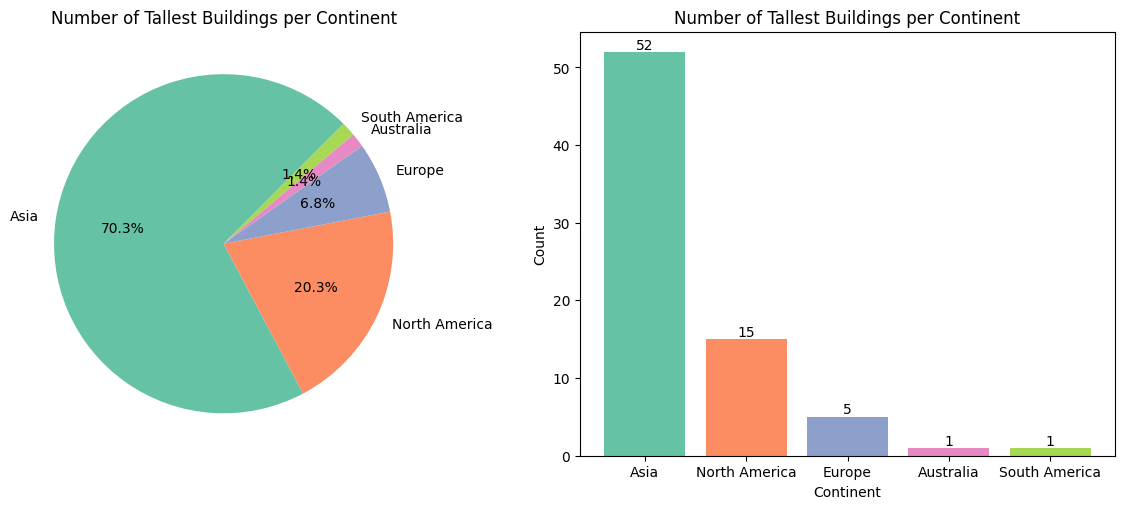

In [7]:
df_count = data.groupby(['Continent'])["Country"].aggregate({'count','count'}).reset_index().sort_values(by='count', ascending=False)

plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1) 
plt.pie(df_count['count'], labels=df_count['Continent'], autopct='%1.1f%%', colors=plt.cm.Set2.colors,startangle=45)
plt.title('Number of Tallest Buildings per Continent')
plt.tight_layout()

plt.subplot(1, 2, 2) 
plt.bar(x=df_count['Continent'], height=df_count['count'], color=plt.cm.Set2.colors)
for i, count in enumerate(df_count['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title("Number of Tallest Buildings per Continent")
plt.xlabel("Continent")
plt.ylabel("Count")

plt.show()

#### Number of Tallest Buildings per Country

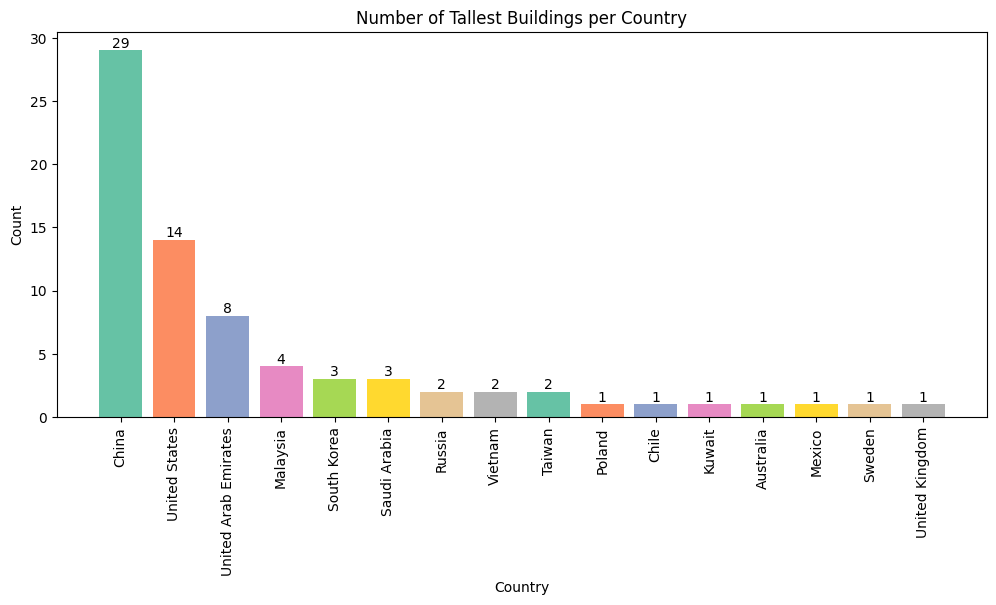

In [8]:
df_count = data.groupby(['Country'])["Building Name"].aggregate({'count','count'}).reset_index().sort_values(by='count', ascending=False)

plt.subplots(figsize=(12, 5))
plt.bar(x=df_count['Country'], height=df_count['count'],color=plt.cm.Set2.colors)
for i, count in enumerate(df_count['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title("Number of Tallest Buildings per Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()

#### Top 10 Cities with Most Tallest Buildings

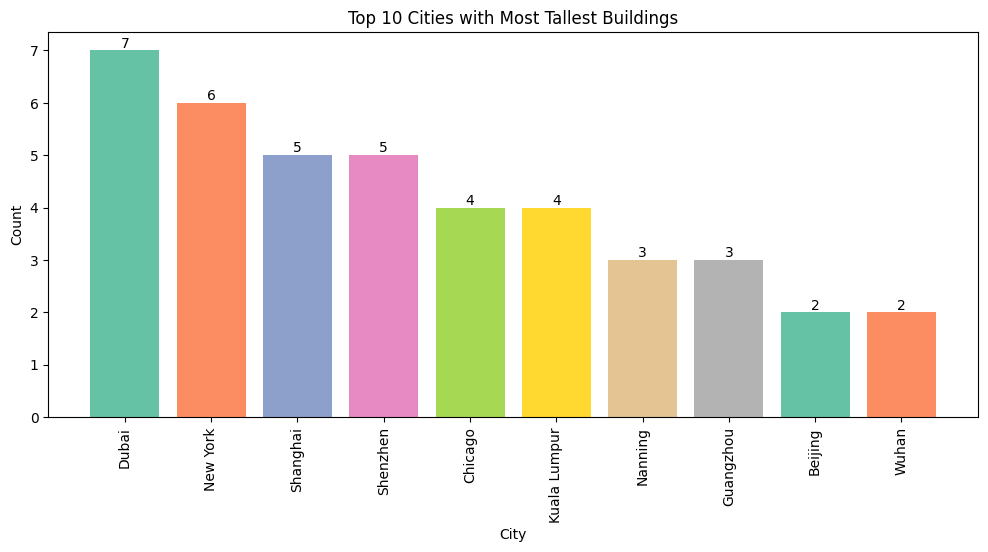

In [9]:
df_count = data.groupby(['City'])["Building Name"].aggregate({'count','count'}).reset_index().sort_values(by='count', ascending=False).head(10)

plt.subplots(figsize=(12, 5))
plt.bar(x=df_count['City'], height=df_count['count'],color=plt.cm.Set2.colors)
for i, count in enumerate(df_count['count']):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title("Top 10 Cities with Most Tallest Buildings")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=90)

plt.show()

#### Number of Tallest Buildings by Continent and Country

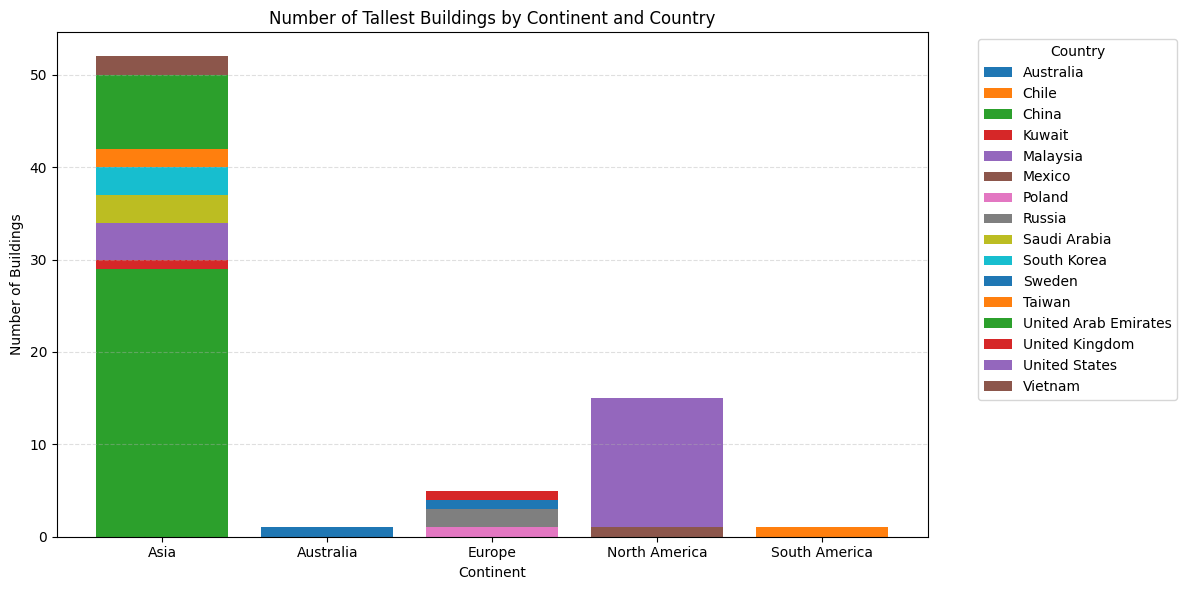

In [10]:
continent_country_df = (
    data
    .groupby(['Continent', 'Country'], observed=True)
    .size()
    .unstack(fill_value=0)
)

fig, ax = plt.subplots(figsize=(12, 6))

bottom = pd.Series(0, index=continent_country_df.index)

for country in continent_country_df.columns:
    ax.bar(
        continent_country_df.index,
        continent_country_df[country],
        bottom=bottom,
        label=country
    )
    bottom += continent_country_df[country]

# Step 3: Plot styling
ax.set_title("Number of Tallest Buildings by Continent and Country")
ax.set_xlabel("Continent")
ax.set_ylabel("Number of Buildings")
ax.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()